In [1]:
include("../partitions.jl")
using ProgressMeter, Dates, Plots, SparseArrays, Statistics
Random.seed!(2025)

TaskLocalRNG()

In [2]:
ks = 10:18
ns = 2 .^ks
burn_in = 200
reps = 10000
times_lumped = zeros(length(ks))
times_reflected = zeros(length(ks))
times_unlumped = zeros(length(ks))
@showprogress for i in 1:length(ks)
    a = spzeros(Integer, ns[i])
    a[1] = ns[i] 
    for _ in 1:burn_in
        a = reflected_burnside_step(a)
    end
    start = now()
    for _ in 1:reps
        a = lumped_burnside_step(a)
    end
    finish = now()
    times_lumped[i] = (finish - start).value/1e3

    a = spzeros(Integer, ns[i])
    a[1] = ns[i] 
    for _ in 1:burn_in
        a = reflected_burnside_step(a)
    end
    start = now()
    for _ in 1:reps
        a = reflected_burnside_step(a)
    end
    finish = now()
    times_reflected[i] = (finish - start).value/1e3

    a = spzeros(Integer, ns[i])
    a[1] = ns[i] 
    for _ in 1:burn_in
        a = reflected_burnside_step(a)
    end
    sigma = partition_to_permuation(a)
    start = now()
    for _ in 1:reps
        sigma = unlumped_burnside_step(sigma)
    end
    finish = now()
    times_unlumped[i] = (finish - start).value/1e3
end


    
    

Progress: 100%|█████████████████████████████████████████| Time: 0:06:50


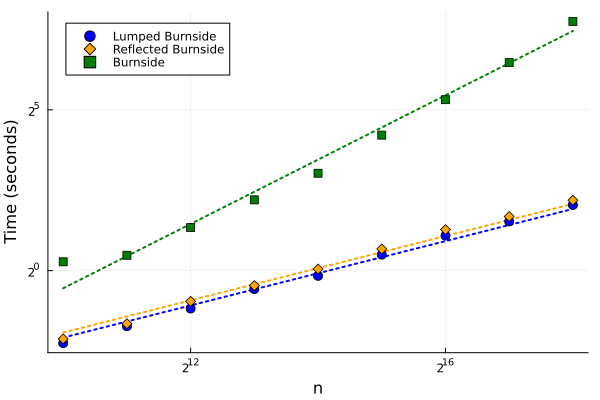

In [3]:
x = log2.(ns)
y1 = log2.(times_lumped)
y2 = log2.(times_reflected)
y3 = log2.(times_unlumped)
b1 = 0.5
b2 = 0.5
b3 = 1
a1 = mean(y1) - b1*mean(x)
a2 = mean(y2) - b2*mean(x)
a3 = mean(y3) - b3*mean(x)

fit1 = 2 .^(a1 .+ b1 .* x)
fit2 = 2 .^(a2 .+ b2 .* x)
fit3 = 2 .^(a3 .+ b3 .* x)

plt = plot(ns, fit1, label = nothing, lw = 2, linestyle = :dot, color =:blue, xscale =:log2, yscale =:log2, legend =:topleft)
plot!(plt, ns, fit2, label = nothing, lw = 2, linestyle = :dot, color =:orange)
plot!(plt, ns, fit3, label = nothing, lw = 2, linestyle = :dot, color =:green)

# Add scatter plots
scatter!(plt, ns, times_lumped, label = "Lumped Burnside", marker = (:circle, 5), color = :blue)
scatter!(plt, ns, times_reflected, label = "Reflected Burnside", marker = (:diamond, 5), color = :orange)
scatter!(plt, ns, times_unlumped, label = "Burnside", marker = (:square, 4), color = :green)

# Customize the plot
xlabel!(plt, "n")
ylabel!(plt, "Time (seconds)")
savefig(plt, "../Figures/partitions_times.pdf")
plt

